In [13]:
import numpy as np
import os, glob
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from matplotlib import animation
from matplotlib import cm
import pandas as pd
import math
from astropy.io import fits

### Calculate the width of the PSF 

In [14]:
NA = 0.4             # Numerical Aperture
n = 1.515            # Refraction Index
Lambda_e = 665       # Emission Wavelength (nm)
pixel_size = 66.67   # (nm)

In [15]:
alfa = math.asin(NA/n)

In [16]:
sigma_ref = (Lambda_e/(2*np.pi*n))*math.sqrt((7*(1-math.cos(alfa)**1.5))/
                                             (4-7*math.cos(alfa)**1.5+3*math.cos(alfa)**3.5))   # (nm)

In [17]:
sigma_ref/pixel_size

5.604199866275947

### Load all the data

In [4]:
image_files = glob.glob(os.path.abspath(os.path.normpath(os.path.join(os.getcwd(),'EXPERIMENT/R5_TCR_FM143fx_ex642_va899_00um_*.fits'))))

In [5]:
image_files = sorted(image_files)

In [6]:
image_files

['/home/mkhoshle/Desktop/Counting/EXPERIMENT/R5_TCR_FM143fx_ex642_va899_00um_00.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENT/R5_TCR_FM143fx_ex642_va899_00um_01.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENT/R5_TCR_FM143fx_ex642_va899_00um_02.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENT/R5_TCR_FM143fx_ex642_va899_00um_03.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENT/R5_TCR_FM143fx_ex642_va899_00um_04.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENT/R5_TCR_FM143fx_ex642_va899_00um_05.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENT/R5_TCR_FM143fx_ex642_va899_00um_06.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENT/R5_TCR_FM143fx_ex642_va899_00um_07.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENT/R5_TCR_FM143fx_ex642_va899_00um_08.fits',
 '/home/mkhoshle/Desktop/Counting/EXPERIMENT/R5_TCR_FM143fx_ex642_va899_00um_09.fits']

In [7]:
Bright_image = os.path.abspath(os.path.normpath(os.path.join(os.getcwd(),'EXPERIMENT/bright_image_01.fits')))
Dark_image = os.path.abspath(os.path.normpath(os.path.join(os.getcwd(),'EXPERIMENT/Dark_image_01.fits')))

## Dark Images 

In [8]:
dark_image = fits.getdata(Dark_image)

In [9]:
# dark_image = dark_image[:4000,:256,:255]

In [10]:
print(dark_image.shape)

(4000, 256, 256)


In [11]:
d_avg_c_f = np.mean(dark_image, axis=(0,2)) # (256,1)

In [12]:
d_avg_r_f = np.mean(dark_image, axis=(0,1))   # (1,256)

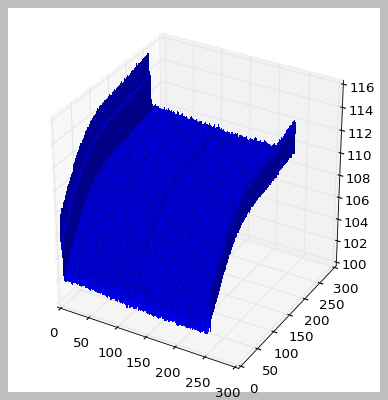

In [13]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1, projection='3d')

X = np.arange(0, 256, 1)
xlen = len(X)
Y = np.arange(0, 256, 1)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, np.mean(dark_image,axis=0), rstride=1, cstride=1,
                       linewidth=0, antialiased=False)

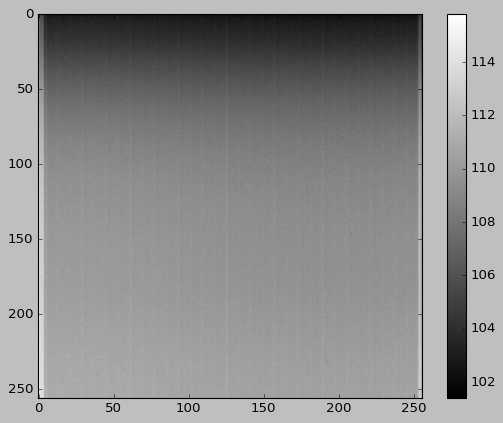

In [14]:
plt.imshow(np.mean(dark_image,axis=0), cmap='gray')
plt.colorbar()

In [15]:
W_off_mean = np.mean(dark_image)
H = np.zeros_like(dark_image)
for j in range(dark_image.shape[0]):
    H[j] = dark_image[j]+W_off_mean-d_avg_c_f.reshape(256,1)-d_avg_r_f.reshape(1,256)

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

def init():
    # Plot the surface.
    ax.plot_surface(X, Y, np.mean(H,axis=0), rstride=1, cstride=1,linewidth=0, antialiased=False)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit=True)

In [ ]:
n, bins, patches = plt.hist(H.flatten(), 1000, facecolor='blue')
plt.xlim([-100,100])

In [ ]:
n, bins, patches = plt.hist(np.mean(H,axis=0).flatten(), 1000, facecolor='blue')
plt.xlim([-1,1])

In [ ]:
np.shape(H)

## Bright Images 

In [ ]:
bright_image = fits.getdata(Bright_image)

In [ ]:
print(bright_image.shape)

In [ ]:
H_b = np.zeros_like(dark_image)
for j in range(dark_image.shape[0]):
    H[j] = dark_image[j]+

## All Images

In [16]:
image_data = []
for i in range(len(image_files)):
    image_data.append(fits.getdata(image_files[i]))

In [17]:
image_data = np.vstack(image_data)

In [18]:
# fits.writeto('EXPERIMENT/out.fits', image_data)

In [19]:
image_data = image_data[1000:,:,:]

In [20]:
np.shape(image_data)

(29000, 256, 256)

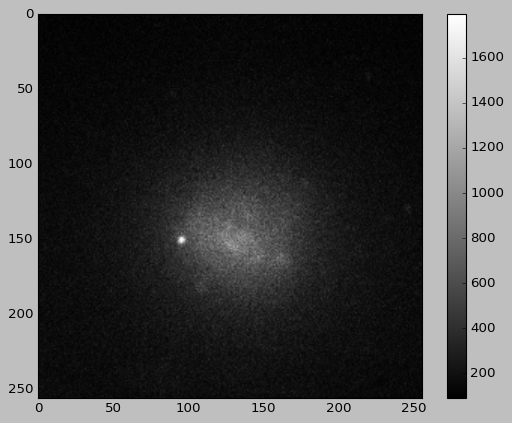

In [21]:
plt.imshow(image_data[0], cmap='gray')
plt.colorbar()

In [22]:
W_off_mean = np.mean(dark_image)
offset = W_off_mean-d_avg_c_f.reshape(256,1)-d_avg_r_f.reshape(1,256)

In [23]:
# H_data = np.zeros_like(image_data)
for j in range(image_data.shape[0]):
    image_data[j] = image_data[j]+offset 

#### Apply Thresholding 

In [24]:
ROIs = []
H_data_t = np.zeros_like(image_data)
for j in range(image_data.shape[0]):
    H_data_t[j] = np.where(image_data[j]<100,0,image_data[j])
    out = np.where(H_data_t[j]>0)
    ROIs.append(np.transpose(out))

In [25]:
ROIs = np.vstack(ROIs)

In [26]:
del(H_data_t)

In [27]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

In [50]:
df = np.max(image_data,axis=0)

In [51]:
out1 = np.transpose(np.where(df>4000))

In [59]:
np.shape(out1)

(105, 2)

In [61]:
np.shape(np.delete(out1,2,0))

(104, 2)

In [162]:
contributing_pixels = []
for k in range(len(out1)):
    i = out1[k][0]
    j = out1[k][1]
    trace_final = (image_data[:,i,j]+image_data[:,i+1,j]+image_data[:,i-1,j]+image_data[:,i,j+1]+
                  image_data[:,i,j-1]+image_data[:,i+1,j+1]+image_data[:,i+1,j-1]+image_data[:,i-1,j+1]+
                  image_data[:,i-1,j-1])
    if np.size(np.where(trace_final>4000))>5:
        contributing_pixels.append(out1[k])

In [163]:
contributing_pixels = np.vstack(contributing_pixels)

In [165]:
len(contributing_pixels)

95

In [244]:
def plot_trace(image_data, i, j, name):
    trace_final = (image_data[:,i,j]+image_data[:,i+1,j]+image_data[:,i-1,j]+image_data[:,i,j+1]+
                  image_data[:,i,j-1]+image_data[:,i+1,j+1]+image_data[:,i+1,j-1]+image_data[:,i-1,j+1]+
                  image_data[:,i-1,j-1])
    print(np.size(np.where(trace_final>4000)))
    fig = plt.figure(figsize=(4,4)) 
    ax = plt.plot(trace_final)
    plt.xlabel('Time')
    plt.ylabel('Intensity')
    plt.xlim([500,800])
    plt.xticks(rotation=90)   
    plt.gcf().subplots_adjust(bottom=0.25,left=0.25)
    fig.savefig(name)
    return None

1875


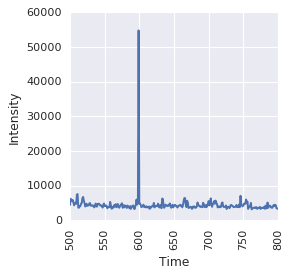

In [245]:
name = 'Time_trace_pixel_165_165_zoomed.pdf'
plot_trace(image_data,165,165,name)

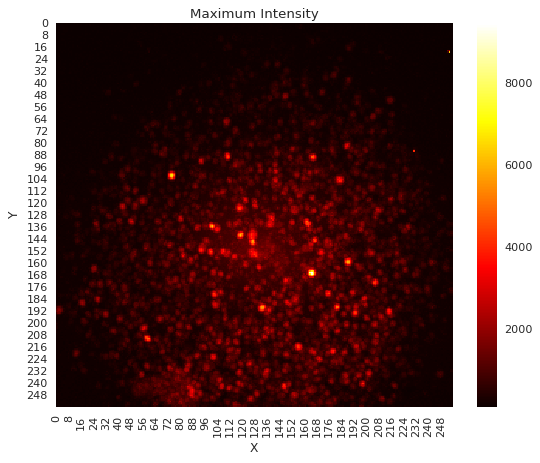

In [174]:
fig = plt.figure() 
ax = sns.heatmap(df,cmap='hot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Maximum Intensity')
fig.savefig('Maximum_Intensity.pdf')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, np.mean(H_data,axis=0), rstride=1, cstride=1,linewidth=0, antialiased=False)
# ax.get_xlim3d([75,175])
ax.view_init(0,90)
plt.draw()

In [ ]:
n, bins, patches = plt.hist(H_data.flatten(), 5000, facecolor='blue')
plt.xlim([-20,600])